In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8])
s

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

In [ ]:
# You can pass a dict of objects that can be converted to "series-like"
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})
df2

In [ ]:
# show the different dtypes of the resulting frame
df2.dtypes

In [ ]:
# show the top rows of the frame
df.head()

In [ ]:
# show the bottom rows of the frame
df.tail(3)

In [ ]:
# show the index
df.index

In [ ]:
# show the columns
df.columns

In [ ]:
# show the underlying numpy data
df.values

In [ ]:
# show a quick statistic summary of the data
df.describe()

In [ ]:
# transpose your data
df.T

In [ ]:
# sort by an axis
df.sort_index(axis=1, ascending=False)

In [ ]:
# sorting by values:
df.sort_values(by='B')

In [ ]:
# selecting a single column
# this is equivalent to `df['A']`
df.A

In [ ]:
# selecting with slices
df[0:3]

In [ ]:
# more slicing
df['20130102':'20130104']

In [ ]:
# get a cross section of the data using a "label"
df.loc[dates[0]]

In [ ]:
# select on a multi-axis by label:
df.loc[:,['A','B']]

In [ ]:
# include label slicing -- BOTH ENDPOINTS ARE INCLUSIVE!
df.loc['20130102':'20130104', ['A','B']]

In [ ]:
# reduce dimensions of the returned object
df.loc['20130102',['A','B']]

In [ ]:
# getting a scalar value
# this is equivalent to `df.at[dates[0],'A']`
df.loc[dates[0], 'A']

In [35]:
# selecting via position of passed integers
df.iloc[3]

A    2.154631
B    0.216826
C   -0.073076
D    0.795301
Name: 2013-01-04 00:00:00, dtype: float64

In [36]:
# selecting by integer slices
df.iloc[3:5,0:2]

,A,B
2013-01-04,2.154631,0.216826
2013-01-05,-0.825306,-0.521392


In [37]:
# select by lists of integer position locations
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.116398,1.222357
2013-01-03,1.673683,0.057106
2013-01-05,-0.825306,-1.103575


In [38]:
# for slicing rows explicitly:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.116398,0.552165,1.222357,-0.798560
2013-01-03,1.673683,0.595552,0.057106,-0.849534


In [39]:
# and then for columns:
df.iloc[:,1:3]

,B,C
2013-01-01,0.801342,-0.876551
2013-01-02,0.552165,1.222357
2013-01-03,0.595552,0.057106
2013-01-04,0.216826,-0.073076
2013-01-05,-0.521392,-1.103575
2013-01-06,0.269295,0.127635


In [40]:
# getting a scalar value
# equivalent to `df.iat[1,1]`
df.iloc[1,1]

0.5521652777191248

In [41]:
# using a single column to select data
df[df.A > 0]

,A,B,C,D
2013-01-02,0.116398,0.552165,1.222357,-0.798560
2013-01-03,1.673683,0.595552,0.057106,-0.849534
2013-01-04,2.154631,0.216826,-0.073076,0.795301


In [42]:
# select from the frame where a boolean condition is met
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.801342,NaN,0.142969
2013-01-02,0.116398,0.552165,1.222357,NaN
2013-01-03,1.673683,0.595552,0.057106,NaN
2013-01-04,2.154631,0.216826,NaN,0.795301
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,0.269295,0.127635,NaN


In [44]:
# using `isin()` for filtering
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.673683,0.595552,0.057106,-0.849534,two
2013-01-05,-0.825306,-0.521392,-1.103575,-1.690855,four


In [45]:
# setting a new column aligns data by indices
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-2.176199,0.801342,-0.876551,0.142969,NaN
2013-01-02,0.116398,0.552165,1.222357,-0.798560,1.0
2013-01-03,1.673683,0.595552,0.057106,-0.849534,2.0
2013-01-04,2.154631,0.216826,-0.073076,0.795301,3.0
2013-01-05,-0.825306,-0.521392,-1.103575,-1.690855,4.0
2013-01-06,-1.271946,0.269295,0.127635,-1.239126,5.0


In [46]:
# set values by label
df.at[dates[0],'A'] = 0
# set values by position
df.iat[0,1] = 0
# set values by assigning with a numpy array
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.876551,5,NaN
2013-01-02,0.116398,0.552165,1.222357,5,1.0
2013-01-03,1.673683,0.595552,0.057106,5,2.0
2013-01-04,2.154631,0.216826,-0.073076,5,3.0
2013-01-05,-0.825306,-0.521392,-1.103575,5,4.0
2013-01-06,-1.271946,0.269295,0.127635,5,5.0


In [47]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.876551,5,NaN
2013-01-02,0.116398,0.552165,1.222357,5,1.0
2013-01-03,1.673683,0.595552,0.057106,5,2.0
2013-01-04,2.154631,0.216826,-0.073076,5,3.0
2013-01-05,-0.825306,-0.521392,-1.103575,5,4.0
2013-01-06,-1.271946,0.269295,0.127635,5,5.0


In [48]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.876551,5,NaN,1.0
2013-01-02,0.116398,0.552165,1.222357,5,1.0,1.0
2013-01-03,1.673683,0.595552,0.057106,5,2.0,NaN
2013-01-04,2.154631,0.216826,-0.073076,5,3.0,NaN


In [49]:
# drop any rows that are missing data
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.116398,0.552165,1.222357,5,1.0,1.0


In [50]:
# fill in missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.876551,5,5.0,1.0
2013-01-02,0.116398,0.552165,1.222357,5,1.0,1.0
2013-01-03,1.673683,0.595552,0.057106,5,2.0,5.0
2013-01-04,2.154631,0.216826,-0.073076,5,3.0,5.0


In [51]:
# get a boolean mask of which values are NaN
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [52]:
# descriptive statistic
df.mean()

A    0.307910
B    0.185408
C   -0.107684
D    5.000000
F    3.000000
dtype: float64

In [53]:
# same on other axis:
df.mean(1)

2013-01-01    1.030862
2013-01-02    1.578184
2013-01-03    1.865268
2013-01-04    2.059676
2013-01-05    1.309946
2013-01-06    1.824997
Freq: D, dtype: float64

In [54]:
# applying functions to data
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.876551,5,NaN
2013-01-02,0.116398,0.552165,0.345806,10,1.0
2013-01-03,1.790081,1.147717,0.402913,15,3.0
2013-01-04,3.944712,1.364544,0.329837,20,6.0
2013-01-05,3.119407,0.843152,-0.773738,25,10.0
2013-01-06,1.847461,1.112447,-0.646103,30,15.0


In [55]:
df.apply(lambda x: x.max() - x.min())

A    3.426577
B    1.116944
C    2.325932
D    0.000000
F    4.000000
dtype: float64

In [57]:
# Histograms
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
s.value_counts()

0    1
1    4
2    0
3    4
4    6
5    5
6    0
7    3
8    1
9    4
dtype: int64


4    3
1    2
0    2
6    1
5    1
3    1
dtype: int64

In [58]:
# Using string methods
s = pd.Series(['A', 'B', 'Aaba', 'Baca', np.nan, 'CABA'])
s.str.lower()

0       a
1       b
2    aaba
3    baca
4     NaN
5    caba
dtype: object

In [59]:
# Concatenating together Pandas objects
df = pd.DataFrame(np.random.randn(10,4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.538456,-0.357108,0.772482,-1.055946
1,-0.052492,-0.645760,0.585133,0.552596
2,0.030185,1.494310,-0.673779,-2.057238
3,-0.267657,0.810643,0.323763,-0.806637
4,-0.927112,0.965904,-0.094305,-0.432638
5,-0.071012,0.890354,0.317683,0.516519
6,-0.131670,1.058778,-1.451294,1.416852
7,-0.901088,-0.458535,0.813900,0.128820
8,0.126982,-1.252240,0.214851,-0.045497
9,-0.426685,-0.981636,0.015574,1.254916


In [61]:
# SQL style merges
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1,2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4,5]})
print(left)
print(right)
pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


In [62]:
# Appending rows to a dataframe
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.042366,1.096806,1.394005,0.206067
1,-0.269605,1.523299,-0.099049,-0.741542
2,1.891285,-0.709184,2.227757,0.140952
3,-0.557486,-0.162581,-0.914008,0.917644
4,0.062489,1.370113,2.289866,0.972445
5,0.908430,1.219037,-0.247425,-0.001099
6,1.445374,0.259062,-0.485594,0.849674
7,0.408124,0.183362,0.086784,-1.510224
8,-0.557486,-0.162581,-0.914008,0.917644


In [64]:
# Group By
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})
print(df)
df.groupby('A').sum()

     A      B         C         D
0  foo    one  0.971281 -0.419043
1  bar    one -0.027894  1.044148
2  foo    two  0.821618 -0.782742
3  bar  three  1.700405  0.859992
4  foo    two  1.261581  0.176590
5  bar    two  0.145259  0.441765
6  foo    one  1.149460  0.537745
7  foo  three  0.423150 -0.255074


,C,D
A,,
bar,1.817770,2.345905
foo,4.627091,-0.742525


In [65]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.027894  1.044148
    three  1.700405  0.859992
    two    0.145259  0.441765
foo one    2.120741  0.118702
    three  0.423150 -0.255074
    two    2.083199 -0.606152

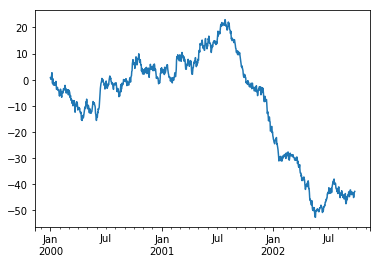

In [66]:
# Plotting
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

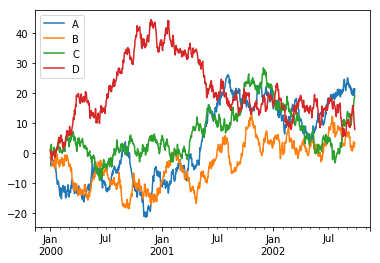

In [73]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A','B','C','D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')